In [12]:
from sklearn.svm import SVC
from get_samples import split_data
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [13]:
X_train, X_test, y_train, y_test = split_data(True)

In [25]:
clf = SVC(kernel='linear', class_weight='balanced')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

InvalidParameterError: The 'C' parameter of SVC must be a float in the range (0.0, inf]. Got 'balanced' instead.

In [24]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.41429273084479373
              precision    recall  f1-score   support

         CAM       0.38      0.33      0.35       406
          CB       0.59      0.62      0.61       286
         CDM       0.45      0.38      0.41       430
          CF       0.00      0.00      0.00        54
          CM       0.41      0.60      0.49       603
          LB       0.32      0.51      0.39       263
          LM       0.26      0.30      0.28       425
          LW       0.00      0.00      0.00       139
         LWB       0.00      0.00      0.00        31
          RB       0.36      0.32      0.34       313
          RM       0.24      0.16      0.19       441
          RW       0.00      0.00      0.00       142
         RWB       0.00      0.00      0.00        39
          ST       0.60      0.84      0.70       500

    accuracy                           0.41      4072
   macro avg       0.26      0.29      0.27      4072
weighted avg       0.36      0.41      0.38      4

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

We see that ST has and CB results are okey atleast. But the rests are pretty bad. Lets try oversample the classes.

In [16]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [17]:
clf.fit(X_train_resampled, y_train_resampled )
y_pred = clf.predict(X_test)

In [18]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.3482318271119843
              precision    recall  f1-score   support

         CAM       0.36      0.35      0.36       406
          CB       0.54      0.64      0.59       286
         CDM       0.43      0.58      0.50       430
          CF       0.06      0.30      0.10        54
          CM       0.47      0.34      0.39       603
          LB       0.35      0.22      0.27       263
          LM       0.29      0.12      0.17       425
          LW       0.13      0.20      0.16       139
         LWB       0.07      0.45      0.11        31
          RB       0.35      0.23      0.28       313
          RM       0.23      0.09      0.13       441
          RW       0.12      0.23      0.15       142
         RWB       0.05      0.21      0.07        39
          ST       0.71      0.63      0.67       500

    accuracy                           0.35      4072
   macro avg       0.30      0.33      0.28      4072
weighted avg       0.39      0.35      0.35      40

Did **NOT** increase the accuracy.

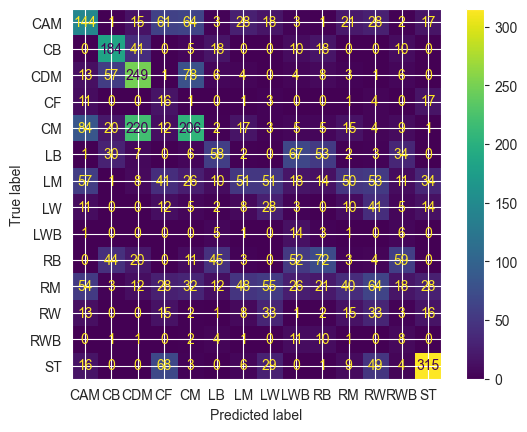

In [19]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

Notice the predictions, ex: CDM is predicted as both CDM and CM.

## Tuning Hyperparameters in SVMs

Support Vector Machines (SVMs) have **four key hyperparameters**: **C**, **Kernel**, **Gamma**, and **Degree**. Each plays a crucial role in the model's performance and behavior.

---

### **1. C (Regularization Parameter)**  
Controls the trade-off between achieving low training error and maintaining a smooth decision boundary to avoid overfitting.

- **Small C**:  
  - Simplifies the model.  
  - Allows some misclassification but generalizes better to unseen data.  

- **Large C**:  
  - Aims to classify all training points correctly.  
  - Risks overfitting, potentially reducing generalization performance.  

Always tune **C**, as it is one of the most critical hyperparameters.

---

### **2. Kernel**  
Specifies the function used to map data into a higher-dimensional space, enabling separation in cases where the data is not linearly separable. Common kernel types include:  

**Linear**:  
  - No transformation applied.  
  - Works best when the data is already linearly separable.  

**RBF (Radial Basis Function)**:  
  - A non-linear kernel that uses a Gaussian function to create decision boundaries.  
  - Effective for complex relationships in data.  

**Polynomial (Poly)**:  
  - A non-linear kernel that fits polynomial decision boundaries.  
  - Complexity is controlled by the **Degree** hyperparameter.  

**Sigmoid**:  
  - Similar to activation functions in neural networks.  
  - Rarely used in practice due to limited effectiveness.

---

### **3. Gamma**  
Defines how far the influence of a single training example reaches. Relevant for non-linear kernels like **RBF** and **Poly**.

**Small Gamma**:  
  - Creates a smoother decision boundary by considering points farther away.  

**Large Gamma**:  
  - Focuses on points closer to the decision boundary, resulting in more complex models.  

---

### **4. Degree**  
Relevant only for the **Poly** kernel. Controls the complexity of the polynomial decision boundary.  

**Low Degree (e.g., 2 or 3)**:  
  - Produces simpler models that may generalize better.  

**High Degree**:  
  - Creates more complex decision boundaries, which may lead to overfitting.  

> Start with a degree of **2 or 3** when using the polynomial kernel.  

---

In [20]:
param_dist = {
    'C': uniform(0.1, 10),  # Sample from a range instead of fixed values
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': uniform(0.01, 1)  # Sample gamma values in a range
}

random_search = RandomizedSearchCV(clf, param_dist, n_iter=20, cv=3, scoring='accuracy', n_jobs=-1)
random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)
print("Best cross-validated accuracy:", random_search.best_score_)

Best parameters: {'C': np.float64(2.4144213107021573), 'gamma': np.float64(0.13446163101478414), 'kernel': 'poly'}
Best cross-validated accuracy: 0.33853114274668666


In [21]:
clf = SVC(kernel='linear', C=5.021332378318706, gamma= 0.7239105820103481)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [22]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.4157662082514735
              precision    recall  f1-score   support

         CAM       0.38      0.33      0.35       406
          CB       0.58      0.63      0.60       286
         CDM       0.45      0.36      0.40       430
          CF       0.00      0.00      0.00        54
          CM       0.41      0.60      0.49       603
          LB       0.33      0.52      0.41       263
          LM       0.26      0.30      0.28       425
          LW       0.00      0.00      0.00       139
         LWB       0.00      0.00      0.00        31
          RB       0.37      0.34      0.35       313
          RM       0.24      0.17      0.20       441
          RW       0.00      0.00      0.00       142
         RWB       0.00      0.00      0.00        39
          ST       0.60      0.83      0.70       500

    accuracy                           0.42      4072
   macro avg       0.26      0.29      0.27      4072
weighted avg       0.36      0.42      0.38      40

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  